In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from skimage.metrics import structural_similarity as ssim

# YCrCb Tests

In [1]:
def compare_images_with_visualization(img_path1, img_path2):
        # Load the images
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)
    
    
    # Convert to YCrCb
    img1_ycrcb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)
    img2_ycrcb = cv2.cvtColor(img2, cv2.COLOR_BGR2YCrCb)

    # Initialize an array to hold the comparison results
    comparison_results = []

    # Channel names for visualization
    channels = ['Y', 'Cr', 'Cb']

    # Plotting setup
    #fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
    #fig.suptitle('Histogram Comparison of YCrCb Channels')

    # Compare each channel (Y, Cr, Cb)
    for i in range(3):
        hist_img1 = cv2.calcHist([img1_ycrcb], [i], None, [256], [0, 256])
        hist_img2 = cv2.calcHist([img2_ycrcb], [i], None, [256], [0, 256])

        cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

        # Plot histograms
        #axes[i, 0].plot(hist_img1, color='blue')
        #axes[i, 0].set_title(f'Image 1 - {channels[i]} Channel')
        #axes[i, 1].plot(hist_img2, color='red')
        #axes[i, 1].set_title(f'Image 2 - {channels[i]} Channel')

        # Compare using Bhattacharyya distance
        comparison_results.append(cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_BHATTACHARYYA))

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.show()

    # Aggregate results (mean for simplicity)
    overall_comparison = np.mean(comparison_results)
    return overall_comparison

In [3]:
patch_paths = [r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\patch1.png",
                r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\patch2.png",
                r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\patch3.png",
                r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\patch4.png",
                r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\patch5.png",
                r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\patch6.png",
                r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\blu.png",
                r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\patch\red.png"
             ]

main_dir = r"D:\IchMorningstar\Research\MLLsecurity\gtsrb-german-traffic-sign\Backdoored_test\clean"

# Get all image names from the current class directory
all_images = [os.path.join(main_dir, f) for f in os.listdir(main_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if len(all_images) < 400:
    print("something's wrong")
else:
    print("testing on")

testing on


In [3]:
all_scores = {}
for patch in patch_paths:
    patch_path = patch
    if patch[-10:].startswith("p"):
        patch_name = patch[-10:]
    else:
        patch_name = patch[-7:]
        
    print(f"{patch_name} starts")
    scores = []
    for image in all_images:
        image_path1 = patch_path
        image_path2 = image
        comparison_score = compare_images_with_visualization(image_path1, image_path2)
        scores.append(comparison_score)
    
    all_scores[patch_name] = scores
    print(f"{patch_name} is done")
    
all_scores.keys()

patch1.png starts
patch1.png is done
patch2.png starts
patch2.png is done
patch3.png starts
patch3.png is done
patch4.png starts
patch4.png is done
patch5.png starts
patch5.png is done
patch6.png starts
patch6.png is done
blu.png starts
blu.png is done
red.png starts
red.png is done


dict_keys(['patch1.png', 'patch2.png', 'patch3.png', 'patch4.png', 'patch5.png', 'patch6.png', 'blu.png', 'red.png'])

In [5]:
Max = []
Min = []
Mean = []
for i in all_scores.keys():
    arr = np.array(all_scores[i])
    Max.append(arr.max())
    Min.append(arr.min())
    Mean.append(arr.mean())
    print(f"max: {arr.max()}, min: {arr.min()}, mean: {arr.mean()}")

max: 0.9843986052556453, min: 0.6699909110560935, mean: 0.8973230574162557
max: 0.8300343323367988, min: 0.5248512072996029, mean: 0.6514602834512653
max: 0.9851289124693586, min: 0.7064700611451937, mean: 0.905535280597287
max: 0.8825677952231411, min: 0.5377270710623062, mean: 0.695146957012022
max: 0.9633514813248606, min: 0.6808083823183123, mean: 0.8701090591552305
max: 0.8482692252617317, min: 0.5219720617907647, mean: 0.6547098882140213
max: 1.0, min: 0.8949848867782078, mean: 0.9700080526015294
max: 0.9996928517665277, min: 0.8939900560983417, mean: 0.9682292533207286


In [7]:
data = {"max": Max, "min": Min, "mean": Mean}
df = pd.DataFrame(data, index = ['patch1','patch2','patch3','patch4','patch5','patch6','blu','red'])
df

,max,min,mean
patch1,0.984399,0.669991,0.897323
patch2,0.830034,0.524851,0.651460
patch3,0.985129,0.706470,0.905535
patch4,0.882568,0.537727,0.695147
patch5,0.963351,0.680808,0.870109
patch6,0.848269,0.521972,0.654710
blu,1.000000,0.894985,0.970008
red,0.999693,0.893990,0.968229


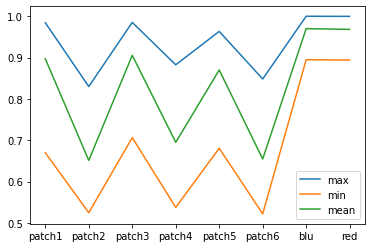

In [15]:
plt.plot(df.index, df["max"], label="max")
plt.plot(df.index, df["min"], label='min')
plt.plot(df.index, df["mean"], label='mean')
plt.legend()
plt.show()

# SSIM Tests

In [4]:
all_scores = {}
def crop_patch(image, top_left, patch_size):
    # Ensure that we do not go beyond the image boundaries
    if top_left[0] + patch_size[0] > image.shape[1] or top_left[1] + patch_size[1] > image.shape[0]:
        return None
    return image[top_left[1]:top_left[1] + patch_size[1], top_left[0]:top_left[0] + patch_size[0]]

for patch in patch_paths:
    patch_path = patch
    if patch[-10:].startswith("p"):
        patch_name = patch[-10:]
    else:
        patch_name = patch[-7:]
        
    print(f"{patch_name} starts")
    image_ind = []
    for image in all_images:
        image1_bgr = cv2.imread(patch_path)
        image2_bgr = cv2.imread(image)
        image1_bgr = cv2.resize(image1_bgr, (26, 26))
        image2_bgr = cv2.resize(image2_bgr, (256, 256))

        # Define the size of the filter
        filter_size = (26, 26)

        # Define the step size for sliding the window
        step = 10  # Adjust the step size as needed

        # Create a copy of the second image for visualization
        visual_image = image2_bgr.copy()
        index_lst = []
        # Slide the window over the image
        for y in range(0, image2_bgr.shape[0] - filter_size[1], step):
            for x in range(0, image2_bgr.shape[1] - filter_size[0], step):
                patch_2 = crop_patch(image2_bgr, (x, y), filter_size)

                if patch_2 is not None:
                    ssim_index = ssim(image1_bgr, patch_2, full=False, multichannel=True, win_size=3)
                    index_lst.append(ssim_index)
        
        image_ind.append(index_lst)
    
    all_scores[patch_name] = np.array(image_ind)
    print(f"{patch_name} is done")
    
all_scores.keys()

patch1.png starts
patch1.png is done
patch2.png starts
patch2.png is done
patch3.png starts
patch3.png is done
patch4.png starts
patch4.png is done
patch5.png starts
patch5.png is done
patch6.png starts
patch6.png is done
blu.png starts
blu.png is done
red.png starts
red.png is done


dict_keys(['patch1.png', 'patch2.png', 'patch3.png', 'patch4.png', 'patch5.png', 'patch6.png', 'blu.png', 'red.png'])

In [5]:
Max = []
Min = []
Mean = []
for i in all_scores.keys():
    arr = np.array(all_scores[i])
    Max.append(arr.max())
    Min.append(arr.min())
    Mean.append(arr.mean())
    print(f"{i}:\nmax: {arr.max()}, min: {arr.min()}, mean: {arr.mean()}")

patch1.png:
max: 0.19089809285243028, min: -0.16557109661517416, mean: -0.0002911228357433384
patch2.png:
max: 0.20706641626231093, min: -0.20740366398595755, mean: 0.0061092570033115055
patch3.png:
max: 0.09801215664882462, min: -0.10627585685377969, mean: -0.004558009860803899
patch4.png:
max: 0.13072498856166634, min: -0.12428890655091898, mean: 0.00988131421627743
patch5.png:
max: 0.18731344570073982, min: -0.18600734943640168, mean: -0.006520663711370062
patch6.png:
max: 0.2183337907515553, min: -0.19522879377330637, mean: 0.008126960297680126
blu.png:
max: 0.9808062348637954, min: -0.9352930203904146, mean: -0.018326573095594705
red.png:
max: 0.9264205753810535, min: -0.7626494931896324, mean: 0.04571343350019394


In [6]:
data = {"max": Max, "min": Min, "mean": Mean}
df = pd.DataFrame(data, index = ['patch1','patch2','patch3','patch4','patch5','patch6','blu','red'])
df

,max,min,mean
patch1,0.190898,-0.165571,-0.000291
patch2,0.207066,-0.207404,0.006109
patch3,0.098012,-0.106276,-0.004558
patch4,0.130725,-0.124289,0.009881
patch5,0.187313,-0.186007,-0.006521
patch6,0.218334,-0.195229,0.008127
blu,0.980806,-0.935293,-0.018327
red,0.926421,-0.762649,0.045713


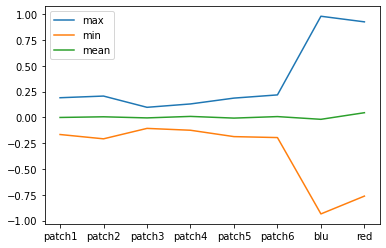

In [7]:
plt.plot(df.index, df["max"], label="max")
plt.plot(df.index, df["min"], label='min')
plt.plot(df.index, df["mean"], label='mean')
plt.legend()
plt.show()

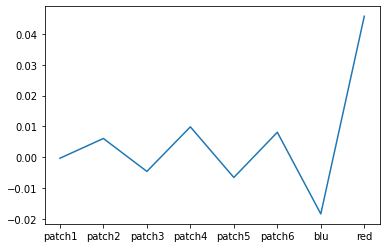

In [11]:
plt.plot(df.index, df["mean"], label='mean')

In [8]:
data_1 = {"max": Max[:-2], "min": Min[:-2], "mean": Mean[:-2]}
df_1 = pd.DataFrame(data_1, index = ['patch1','patch2','patch3','patch4','patch5','patch6'])
df_1

,max,min,mean
patch1,0.190898,-0.165571,-0.000291
patch2,0.207066,-0.207404,0.006109
patch3,0.098012,-0.106276,-0.004558
patch4,0.130725,-0.124289,0.009881
patch5,0.187313,-0.186007,-0.006521
patch6,0.218334,-0.195229,0.008127


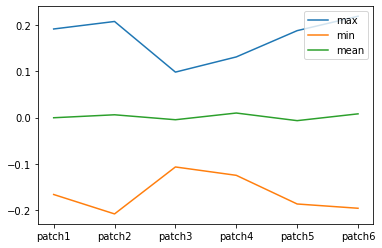

In [9]:
plt.plot(df_1.index, df_1["max"], label="max")
plt.plot(df_1.index, df_1["min"], label='min')
plt.plot(df_1.index, df_1["mean"], label='mean')
plt.legend()
plt.show()

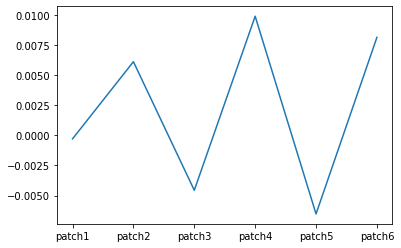

In [10]:
plt.plot(df_1.index, df_1["mean"], label='mean')